# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 5: <font color=blue>Regularized Linear Regression and Bias vs. Variance</font>

## <font color=green>Regularized Linear Regression  </font>
>In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. 

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
import seaborn as sns

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# will be used to transform the y
import pandas as pd

# import of my own functions
import my_ML_functions
#set up
sigmoid = my_ML_functions.sigmoid

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Let's first import the data and visualize it
We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y.

This dataset is divided into three parts:

[•] A training set that your model will learn on: X, y

[•] A cross validation set for determining the regularization parameter: Xval, yval

[•] A test set for evaluating performance. These are “unseen” examples which your model did not see during training: Xtest, ytest


In [2]:
#loading and storing data sets in arrays
data = loadmat('Data/RegularizedLinearReg-ex5data1.mat')
X_train = data['X']
y_train = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

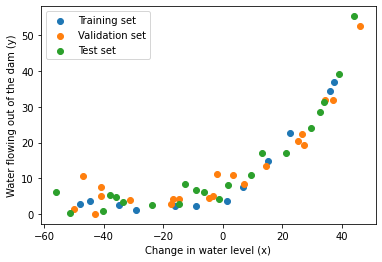

In [3]:
#Let's plot the data
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_val,y_val)
plt.scatter(X_test,y_test)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.legend(['Training set','Validation set','Test set']);

## Regularized Linear Regression Cost Function
> Your task is to write a function to calculate the regularized linear regression cost function. If possible, try to vectorize your code and avoid writing loops. When you are finished, run your cost function using theta initialized at [1; 1]. You should expect to see an output of 303.993.

In [4]:
# Set up variables
m,n = X_train.shape
lambda_ = 1
# Add ones to the X matrix
ones = np.ones((m,1))
Xp = np.concatenate([ones,X_train],axis=1)

Theta = np.array([1,1]).reshape(1,-1)

#print(Xp.shape,Theta.shape)
h = Xp.dot(Theta.T)

#print(h.shape,y_train.shape)
error = h - y_train

reg = (lambda_ / (2 * m)) * np.sum(np.square(Theta[1:]))
J = (1 / (2 * m)) * np.sum(np.square(error)) + reg
J

303.9515255535976

## Regularized Linear Regression Gradient
> In your previous function, add code to calculate the gradient, returning it in the variable grad. When you are finished, run your gradient function using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].

In [6]:
# Set up variables
m,n = X_train.shape
lambda_ = 1
# Add ones to the X matrix
ones = np.ones((m,1))
Xp = np.concatenate([ones,X_train],axis=1)

Theta = np.array([1,1]).reshape(1,-1)
#Theta = np.c_[1,1]

#print(Xp.shape,Theta.shape)
h = Xp.dot(Theta.T)

#print(h.shape,y_train.shape)
error = h - y_train

reg = (lambda_ / (2 * m)) * np.sum(np.square(Theta[1:]))
J = (1 / (2 * m)) * np.sum(np.square(error)) + reg

#print(error.shape,Xp.shape)
grad = (1 / m) * (error.T.dot(Xp)) 
grad[1:] = grad[1:] + (lambda_ / m) * Theta[1:]
print(grad)

[[-15.30301567 598.16741084]]


In [7]:
# Rewrite as a function
def linearRegCostFunction(theta,X,y,lambda_):
    """Calculate the cost function and the gradient for the case of regularized linear regression
    """
    # Set up variables
    m,n = X.shape
    grad = np.zeros(theta.shape)
    # Add ones to the X matrix
    ones = np.ones((m,1))
    Xp = np.concatenate([ones,X],axis=1)

    #costfunction
    h = Xp.dot(theta.T)
    error = h - y
    reg = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / (2 * m)) * np.sum(np.square(error)) + reg
    
    #gradient
    grad = (1 / m) * (error.T.dot(Xp)) 
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    
    return J,grad

In [8]:
# Testing the function
#You should expet to see J = 303.993
#You should expect to see a gradient of [-15.30; 598.250]
lambda_ = 1
Theta = np.array([1,1]).reshape(1,-1)
J,grad = linearRegCostFunction(Theta,X_train,y_train,lambda_)
print(J,grad)

303.9515255535976 [[-15.30301567 598.16741084]]


## Fitting Linear Regression
> First Compute the optimal values of theta

>In this part, we set regularization parameter λ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional θ, regularization will not be incredibly helpful for a θ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with
regularization.

In [9]:
# Optimization
#remember: y as vector with ravel and jac=true
lambda_ = 1
Theta = np.array([1,1]).reshape(1,-1)
options = {'maxiter': 100}
res=optimize.minimize(linearRegCostFunction,Theta,(X_train,y_train.ravel(),lambda_),
                      jac=True, method='bfgs',options=options)
res.message,res.x

('Optimization terminated successfully.', array([13.08771418,  0.367742  ]))

In [10]:
# Deploy your Regularized Linear Regression model
# Set up variables
m,n = X_train.shape
# Add ones to the X matrix
ones = np.ones((m,1))
Xp = np.concatenate([ones,X_train],axis=1)
modelScipy = Xp.dot(res.x)

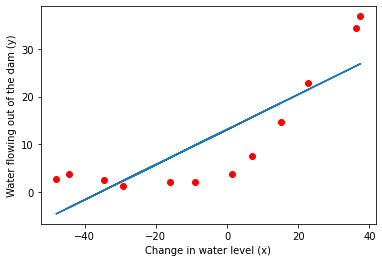

In [11]:
#Let's plot the data
plt.figure()
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,modelScipy)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, you will implement a function to generate learning curves that can help you debug your learning algorithm even if it is not easy to visualize the data.

In [12]:
#Let's do it with Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 

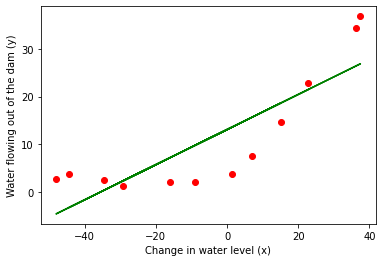

In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train.ravel())
optTheta = [model.intercept_,model.coef_[0]]

#deploy the model
# Set up variables
m,n = X_train.shape
# Add ones to the X matrix
ones = np.ones((m,1))
Xp = np.concatenate([ones,X_train],axis=1)
modelsk = Xp.dot(optTheta)

#plot the results
plt.figure()
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,modelsk,c='green')
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

## <font color=green>Bias Vs. Variance  </font>
>An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

## Learning Curves
>You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size.

>To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X. Specifically, for a training set size of i, you should use the first i examples (i.e., X(1:i,:) and y(1:i)).

>You can use the trainLinearReg function to find the θ parameters. Note that the lambda is passed as a parameter to the learningCurve function. After learning the θ parameters, you should compute the error on the training and cross validation sets.

>In particular, note that the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set λ to 0 only when using it to compute the training error and cross validation error. When you are computing the training set error, make sure you compute it on the training subset (i.e., X(1:n,:) and y(1:n)) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. You should store the computed errors in the vectors error train and error val.

In [14]:
def trainLinearReg(X,y,lambda_):
    """Train the neural network and return the optimized weights
    """
    m,n = X.shape
    InitTheta = np.array(np.ones(n+1)).reshape(1,-1)
    options = {'maxiter': 100}
    res=optimize.minimize(linearRegCostFunction,InitTheta,(X,y.ravel(),lambda_),jac=True, method='bfgs',options=options)
    
    return res.x

In [15]:
def learningCurve(X,y,Xval,yval,lambda_):
    """Calculate and plot the training and cross validation error 
    as a function of training examples and for a given lambda
    """
    # Set up variables
    m,n = X.shape
    item = []
    J_train = np.zeros(m)
    J_cv = np.zeros(m)
    for i in range(1,m+1):
        #trainLinearReg
        theta = trainLinearReg(X[:i,:],y[:i,:],lambda_)
        item.append(i)
        #print(theta)
        #Training Costfunction
        J_train[i - 1],_ = linearRegCostFunction(theta,X[:i,:],y[:i,:].ravel(),lambda_=0.0)
    
        #print(theta,Jtrain)
        J_cv[i - 1],_ = linearRegCostFunction(theta,Xval,yval.ravel(),lambda_=0.0)

    return item,J_train,J_cv

         J_train        J_cv
1   7.326980e-26  138.846777
2   1.218635e-03  113.481892
3   3.288607e+00   44.631333
4   2.843756e+00   48.071162
5   1.315438e+01   35.799145
6   1.944425e+01   33.757219
7   2.009873e+01   31.916901
8   1.817301e+01   30.824305
9   2.260953e+01   31.104587
10  2.326154e+01   28.925958
11  2.431732e+01   29.547671
12  2.237396e+01   29.427464


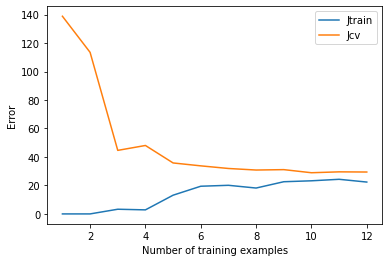

In [16]:
item,J_train,J_cv = learningCurve(X_train,y_train,X_val,y_val,10)
results = pd.DataFrame(J_train,columns=['J_train'],index=[1,2,3,4,5,6,7,8,9,10,11,12])
results['J_cv'] = J_cv
print(results.head(12))
plt.figure()
plt.plot(item,J_train)
plt.plot(item,J_cv)
plt.legend(['Jtrain','Jcv'])
plt.xlabel('Number of training examples');
plt.ylabel('Error');

## <font color=green>Polynomial Regression  </font>
>The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.

>Your task in this part is to complete the code in polyFeatures.m so that the function maps the original training set X of size m × 1 into its higher powers. Specifically, when a training set X of size m × 1 is passed into the function, the function should return a m×p matrix X poly, where column 1 holds the original values of X, column 2 holds the values of X.^2, column 3 holds the values of X.^3, and so on. Note that you don’t have to account for the zero-eth power in this function.

In [17]:
def polyFeatures(X,p):
    """maps the training set X into its higher powers
    """
    m,n = X.shape
    mat = np.zeros((m,p))
    
    for i in range(m):
        for j in range(p):
            mat[i,j] = X[i,0]**(j+1)
    return mat

## Learning Polynomial Regression

In [18]:
def featureNormalize(X):
    """ Normalization function
    """
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with x = 40 will now have a feature x8 = 408 = 6.5 × 1012). Therefore, you will need to use feature normalization.
Before learning the parameters θ for the polynomial regression, first call featureNormalize and normalize the features of the training set, storing the mu, sigma parameters separately. 

In [19]:
power = 8

#Training set
X_poly = polyFeatures(X_train,power)
X_poly, mu, sigma = featureNormalize(X_poly)

#CrossValidation set
X_poly_val = polyFeatures(X_val,power)
X_poly_val, mu_val, sigma_val = featureNormalize(X_poly_val)

After learning the parameters θ, you should plots the generated model and learning curves for polynomial regression with λ = 0.

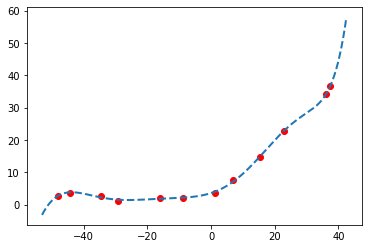

In [20]:
#Train the model
lambda_ = 0
optweights = trainLinearReg(X_poly,y_train,lambda_)


x = np.arange(np.min(X_train) - 5, np.max(X_train) + 5, 0.05).reshape(-1, 1)
# Map the X values
X_plot = polyFeatures(x, power)
X_plot -= mu
X_plot /= sigma

# Add ones
X_plot = np.concatenate([np.ones((x.shape[0], 1)), X_plot], axis=1)

# Plot the results
plt.figure()
plt.scatter(X_train,y_train,c='red')
plt.plot(x, np.dot(X_plot, optweights), '--', lw=2);

         J_train        J_cv
1   9.860761e-32  106.425573
2   2.183078e-12  106.347105
3   5.672882e-11   46.117348
4   1.432970e-12   44.313835
5   1.453703e-13    7.305095
6   7.314595e-12   12.333102
7   1.214861e-10   21.422780
8   1.343950e-07   14.318122
9   5.560776e-08   15.025620
10  1.081801e-02   51.303296
11  3.121901e-02   28.889695
12  2.889295e-02   30.506607


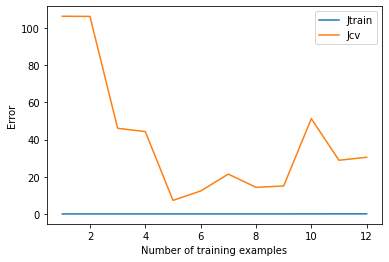

In [21]:
item,J_train,J_cv = learningCurve(X_poly,y_train,X_poly_val,y_val,lambda_)
results = pd.DataFrame(J_train,columns=['J_train'],index=[1,2,3,4,5,6,7,8,9,10,11,12])
results['J_cv'] = J_cv
print(results.head(12))
plt.figure()
plt.plot(item,J_train)
plt.plot(item,J_cv)
plt.legend(['Jtrain','Jcv'])
plt.xlabel('Number of training examples');
plt.ylabel('Error');

We see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

To better understand the problems with the unregularized (λ = 0) model, you can see that the learning curve shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem (Overfitting).

## Selecting λ using a cross validation set
>In this section, you will implement an automated method to select the λ parameter. Concretely, you will use a cross validation set to evaluate how good each λ value is. After selecting the best λ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

>Specifically, you should should use the trainLinearReg function to train the model using different values of λ and compute the training error and cross validation error.
You should try λ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [22]:
power = 8

#Training set
X_poly = polyFeatures(X_train,power)
X_poly, mu, sigma = featureNormalize(X_poly)

#CrossValidation set
X_poly_val = polyFeatures(X_val,power)
X_poly_val, mu_val, sigma_val = featureNormalize(X_poly_val)

         J_train       J_cv
0.000   0.028893  30.506607
0.001   0.112689  10.368372
0.003   0.170966  14.810727
0.010   0.221479  15.074044
0.030   0.281858  12.040890
0.100   0.459323   7.999290
0.300   0.921760   5.396697
1.000   2.076187   4.696682
2.000   3.442289   4.695240
3.000   4.901351   5.005839
4.000   6.466837   5.656029
5.000   8.093938   6.576269
6.000   9.742421   7.689077
7.000  11.383008   8.930601


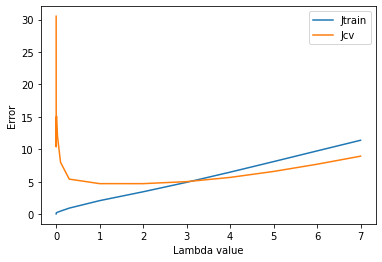

In [23]:
Lambda = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,2,3,4,5,6,7]
m,n = X_poly.shape
J_train = []
J_cv = []
for elm in Lambda:
    optweight = trainLinearReg(X_poly,y_train,elm)
    #Training Costfunction
    a,_ = linearRegCostFunction(optweight,X_poly,y_train.ravel(),lambda_=0.0)
    J_train.append(a)
    #CrossValidation function
    b,_ = linearRegCostFunction(optweight,X_poly_val,y_val.ravel(),lambda_=0.0)
    J_cv.append(b)
#J_train,J_cv

results = pd.DataFrame(J_train,columns=['J_train'],index=Lambda)
results['J_cv'] = J_cv
print(results.head(len(Lambda)))
plt.figure()
plt.plot(Lambda,J_train);
plt.plot(Lambda,J_cv);
plt.legend(['Jtrain','Jcv']);
plt.ylabel('Error');
plt.xlabel('Lambda value');

In this figure, we can see that the best value of λ is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

## Computing Test Set Error
>To get a better indication of the model’s performance in the real world, it is important to evaluate the “final” model on a test set that was not used in any part of training (that is, it was neither used to select the λ parameters, nor to learn the model parameters θ).
You should compute the test error using the best value of λ you found. In our cross validation, we obtained a test error of 3.8599 for λ = 3.

In [24]:
power = 8

#Training set
X_poly = polyFeatures(X_train,power)
X_poly, mu, sigma = featureNormalize(X_poly)

#CrossValidation set
X_poly_val = polyFeatures(X_val,power)
X_poly_val, mu_val, sigma_val = featureNormalize(X_poly_val)

#Test Set
X_poly_test = polyFeatures(X_test,power)
X_poly_test, mu_test, sigma_test = featureNormalize(X_poly_test)

In [25]:
lambda_ = 1
optweight = trainLinearReg(X_poly,y_train,lambda_)

J_test, _ = linearRegCostFunction(optweight,X_poly_test,y_test.ravel(),lambda_)

print('My test error is of',J_test)

My test error is of 10.433127948343127
